Мы уже второй год живем в ситуации пандемии. За это время собрано много информации по теме заболевания COVID-19. Одним из базовых источников информации по распространению инфекции является датасет, который ведёт Университет Джона Хопкинса (https://github.com/CSSEGISandData/COVID-19). Там ведется ежедневная статистика по количеству выявленных случаев заражения, числу выздоровевших, а также числу людей, погибших от коронавируса.

Проведите анализ данных за последний год от даты сдачи задания на проверку. Работу выполняйте в виде блокнота для Google Colab. Используя изученные на прошлых занятиях методы, проведите кластеризацию стран по показателям заболеваемости, смертности и выздоровлений за прошедшие сутки. Визуализируйте результаты. Сколько получилось кластеров? Где оказалась Россия? Сделайте выводы. Проведите аналогичный анализ для каждого из 12 предыдущих месяцев. Есть ли различие в кластерах? Если есть, то как его можно объяснить?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
!pip install tslearn
from tslearn.clustering import TimeSeriesKMeans
from sklearn.preprocessing import StandardScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_confirmed = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COVID-19/time_series_covid19_confirmed_global.csv')
df_recovered = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COVID-19/time_series_covid19_recovered_global.csv')
df_deaths = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COVID-19/time_series_covid19_deaths_global.csv')

In [ ]:
df_deaths = df_deaths.groupby(by=['Country/Region']).sum()
df_recovered = df_recovered.groupby(by=['Country/Region']).sum()
df_confirmed = df_confirmed.groupby(by=['Country/Region']).sum()

In [ ]:
df_deaths = df_deaths.drop(df_deaths.columns[:-365], axis=1)
df_confirmed = df_confirmed.drop(df_confirmed.columns[:-365], axis=1)
df_recovered = df_recovered.drop(df_recovered.columns[:-365], axis=1)

In [ ]:
df_confirmed

,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,...,10/8/22,10/9/22,10/10/22,10/11/22,10/12/22,10/13/22,10/14/22,10/15/22,10/16/22,10/17/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124,...,200202,200372,200469,200626,200729,200846,201014,201096,201212,201276
Albania,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282,...,332472,332494,332503,332534,332555,332579,332598,332619,332638,332645
Algeria,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069,...,270701,270707,270713,270716,270722,270722,270734,270734,270740,270757
Andorra,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462,...,46275,46275,46275,46275,46366,46366,46366,46366,46366,46366
Angola,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,448322,449031,449705,449980,450310,450310,450310,451459,451897,452272,...,702804,702804,702804,702804,702804,702804,702804,702804,702804,702804
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,9556,9575,9596,9635,9650,9662,9678,9694,9711,9728,...,11939,11939,11939,11939,11939,11939,11939,11939,11939,11939


In [ ]:
df_deaths

,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,...,10/8/22,10/9/22,10/10/22,10/11/22,10/12/22,10/13/22,10/14/22,10/15/22,10/16/22,10/17/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7246,7247,7247,7249,7252,7253,7255,7260,7262,7266,...,7804,7806,7807,7807,7807,7809,7809,7811,7811,7811
Albania,2829,2841,2849,2855,2863,2870,2874,2880,2888,2893,...,3589,3589,3589,3590,3591,3591,3591,3591,3591,3592
Algeria,5873,5875,5878,5881,5883,5886,5890,5894,5899,5904,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
Andorra,130,130,130,130,130,130,130,130,130,130,...,155,155,155,155,155,155,155,155,155,155
Angola,1670,1678,1682,1685,1693,1695,1697,1701,1702,1703,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,4585,4590,4599,4604,4611,4611,4611,4636,4644,4651,...,5707,5707,5707,5707,5707,5707,5707,5707,5707,5707
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,1807,1813,1821,1831,1835,1838,1840,1850,1858,1868,...,2158,2158,2158,2158,2158,2158,2158,2158,2158,2158


In [ ]:
df_recovered

,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,...,10/8/22,10/9/22,10/10/22,10/11/22,10/12/22,10/13/22,10/14/22,10/15/22,10/16/22,10/17/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sc = StandardScaler()
sc_df_c = sc.fit_transform(df_confirmed)
sc_df_r = sc.fit_transform(df_recovered)
sc_df_d = sc.fit_transform(df_deaths)

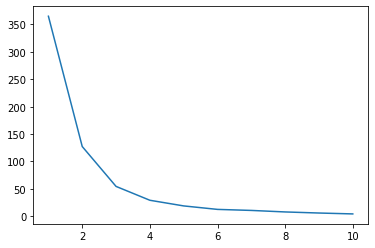

In [ ]:
wcss = []
for i in range(1, 11):
    tskm = TimeSeriesKMeans(n_clusters = i)
    tskm.fit(sc_df_c)
    wcss.append(tskm.inertia_)
plt.plot(range(1, 11), wcss)
plt.show()

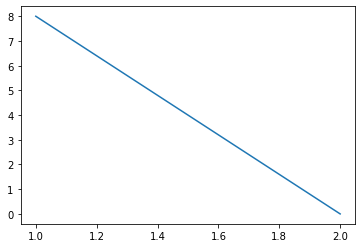

In [ ]:
wcss = []
for i in range(1, 11):
    tskm = TimeSeriesKMeans(n_clusters = i)
    tskm.fit(sc_df_r)
    wcss.append(tskm.inertia_)
plt.plot(range(1, 11), wcss)
plt.show()

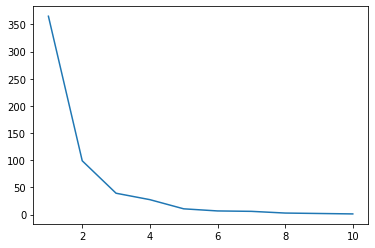

In [ ]:
wcss = []
for i in range(1, 11):
    tskm = TimeSeriesKMeans(n_clusters = i)
    tskm.fit(sc_df_d)
    wcss.append(tskm.inertia_)
plt.plot(range(1, 11), wcss)
plt.show()

In [ ]:
ts_c = TimeSeriesKMeans(n_clusters=4, metric='dtw').fit(sc_df_c)
ts_r = TimeSeriesKMeans(n_clusters=1, metric='dtw').fit(sc_df_r)
ts_d = TimeSeriesKMeans(n_clusters=5, metric='dtw').fit(sc_df_d)

Text(7903963, 21011201, 'Russia')

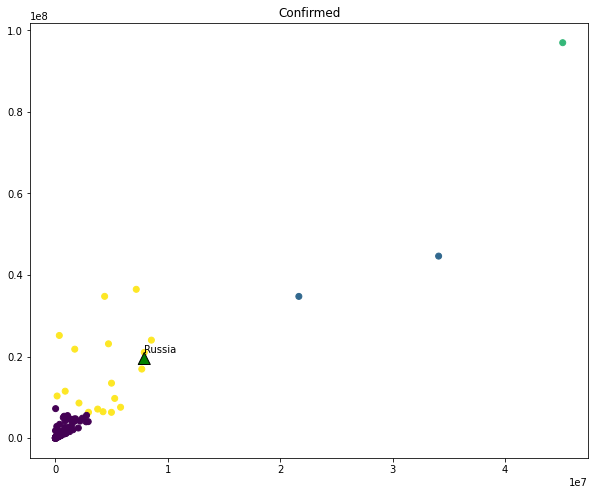

In [ ]:
plt.figure(figsize=(10, 8))
display(plt.scatter(df_confirmed.iloc[:,0], df_confirmed.iloc[:,-1],  c=ts_c.labels_))
plt.title('Confirmed')
plt.annotate('Russia', xy =(df_confirmed.iloc[147,0], df_confirmed.iloc[147,-1]),  arrowprops = dict(facecolor ='green', shrink = 0.05))

Text(0, 0, 'Russia')

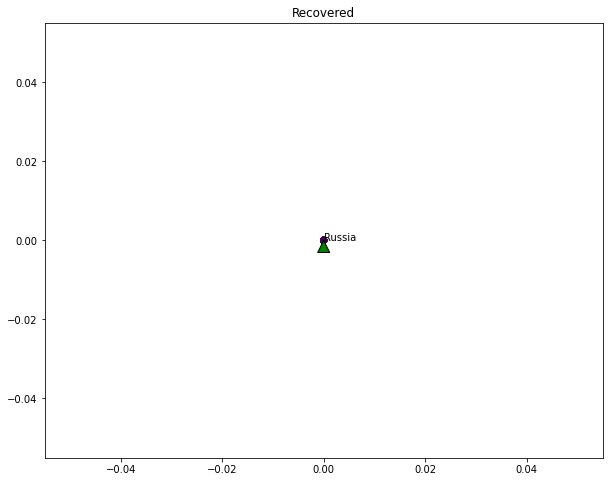

In [ ]:
plt.figure(figsize=(10, 8))
display(plt.scatter(df_recovered.iloc[:,0], df_recovered.iloc[:,-1],  c=ts_r.labels_))
plt.title('Recovered')
plt.annotate('Russia', xy =(df_recovered.iloc[147,0], df_recovered.iloc[147,-1]),  arrowprops = dict(facecolor ='green', shrink = 0.05))

Text(220323, 381134, 'Russia')

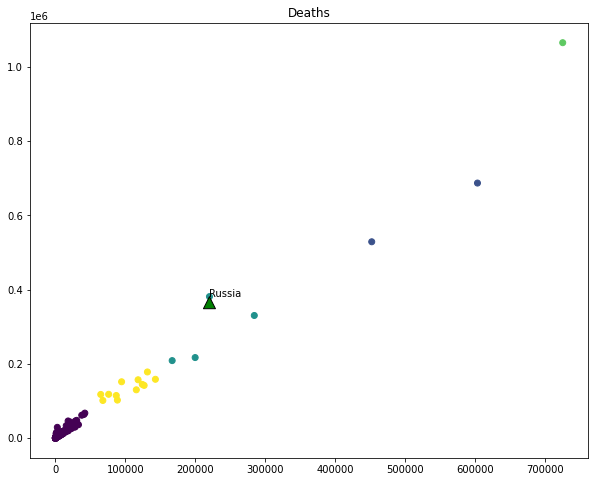

In [ ]:
plt.figure(figsize=(10, 8))
display(plt.scatter(df_deaths.iloc[:,0], df_deaths.iloc[:,-1],  c=ts_d.labels_))
plt.title('Deaths')
plt.annotate('Russia', xy =(df_deaths.iloc[147,0], df_deaths.iloc[147,-1]),  arrowprops = dict(facecolor ='green', shrink = 0.05))

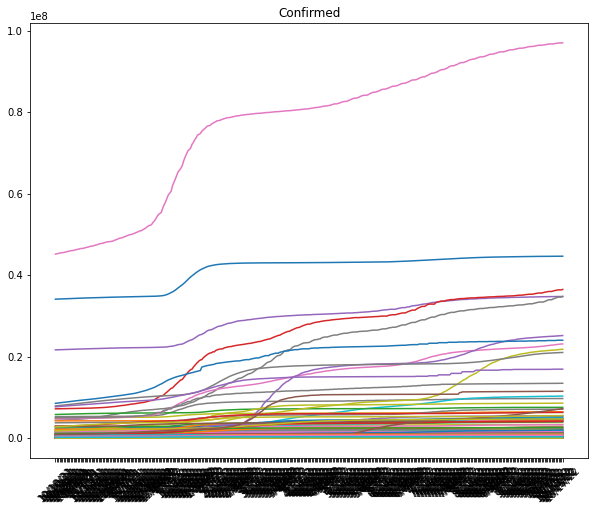

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(0, 200):
  plt.plot(df_confirmed.iloc[i])
plt.title('Confirmed')
plt.tick_params(axis='x', labelrotation=45)
plt.show()

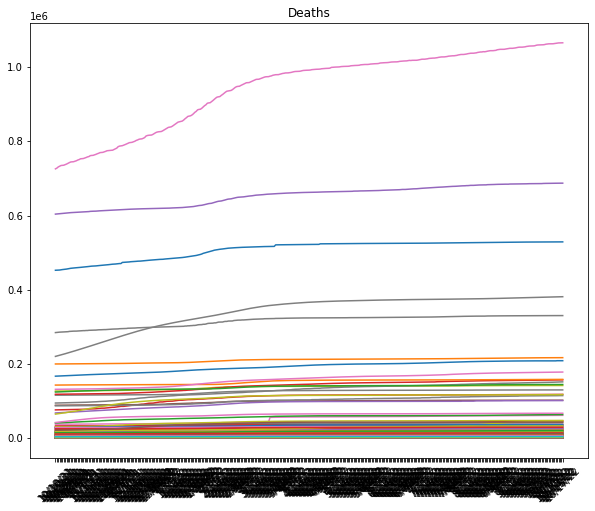

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(0, 200):
  plt.plot(df_deaths.iloc[i])
plt.title('Deaths')
plt.tick_params(axis='x', labelrotation=45)
plt.show()

In [ ]:
conf_months = []
conf_months.append(df_confirmed.iloc[:,0:31])
conf_months.append(df_confirmed.iloc[:,31:61])
conf_months.append(df_confirmed.iloc[:,61:92])
conf_months.append(df_confirmed.iloc[:,92:123])
conf_months.append(df_confirmed.iloc[:,123:151])
conf_months.append(df_confirmed.iloc[:,151:182])
conf_months.append(df_confirmed.iloc[:,182:212])
conf_months.append(df_confirmed.iloc[:,212:243])
conf_months.append(df_confirmed.iloc[:,243:273])
conf_months.append(df_confirmed.iloc[:,273:304])
conf_months.append(df_confirmed.iloc[:,304:335])
conf_months.append(df_confirmed.iloc[:,335:365])

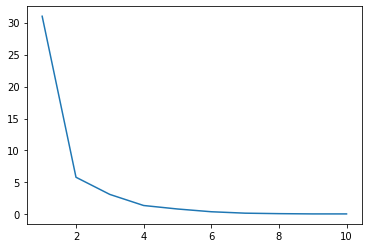

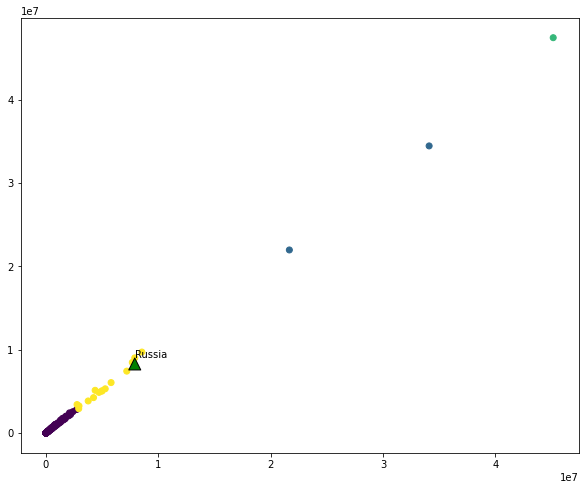

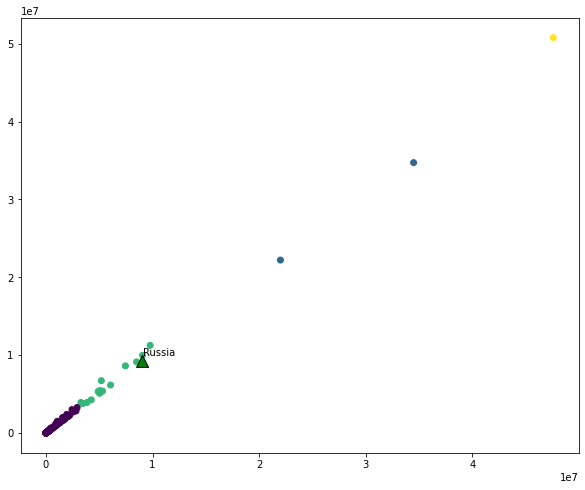

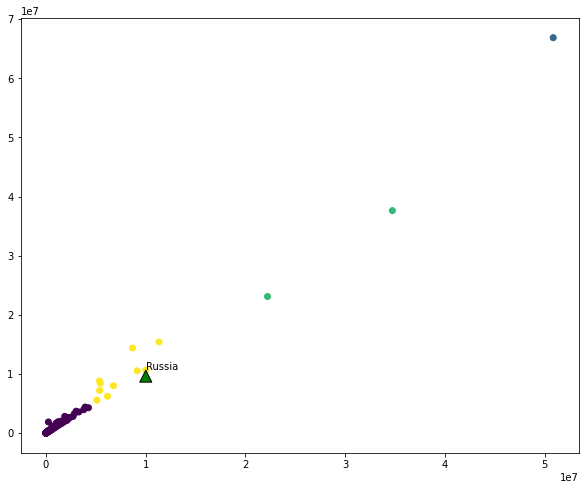

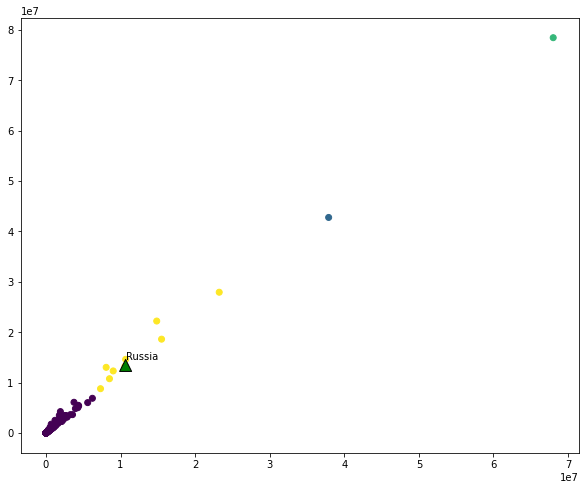

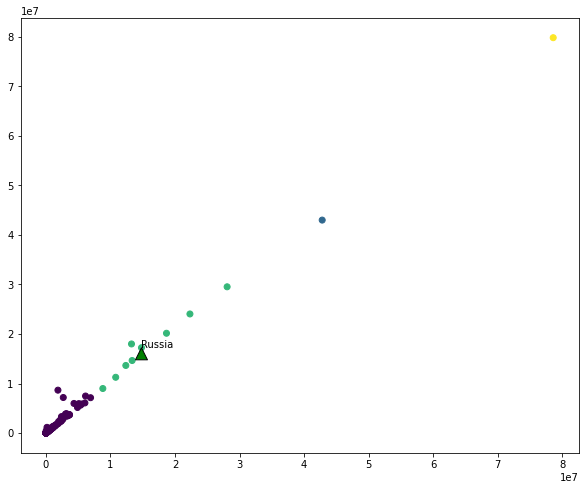

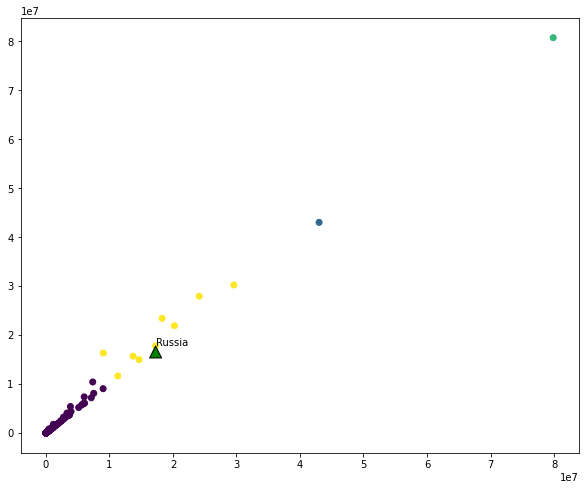

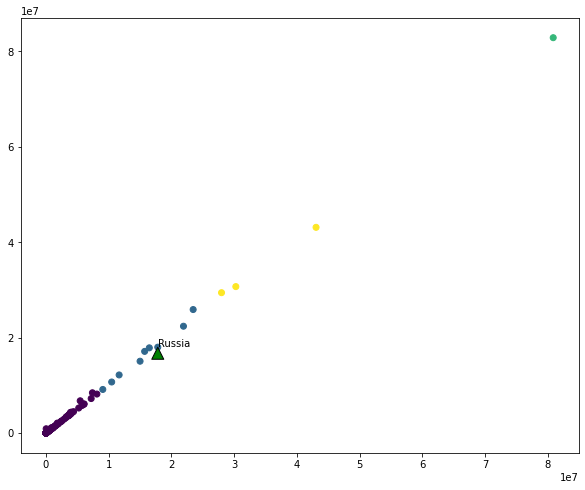

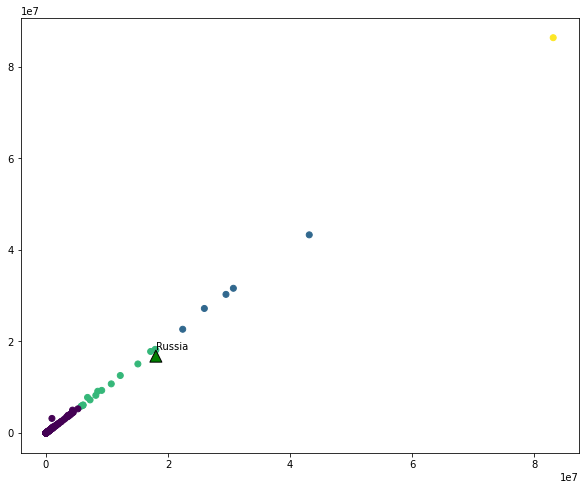

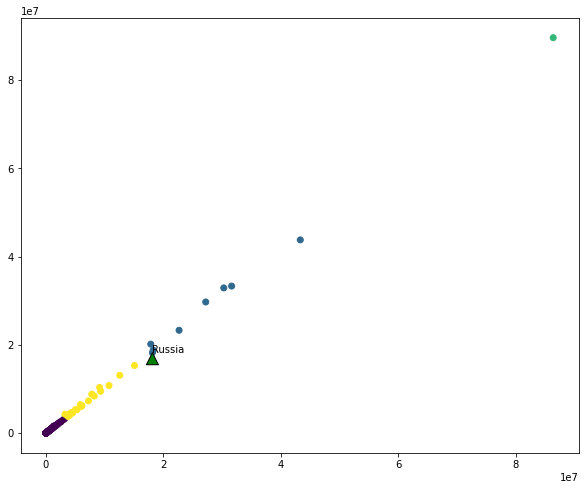

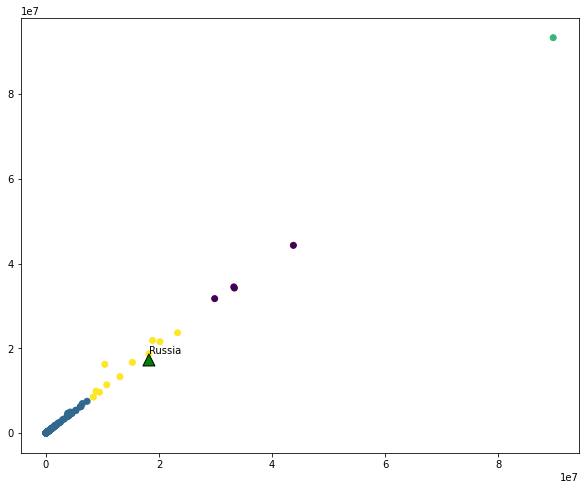

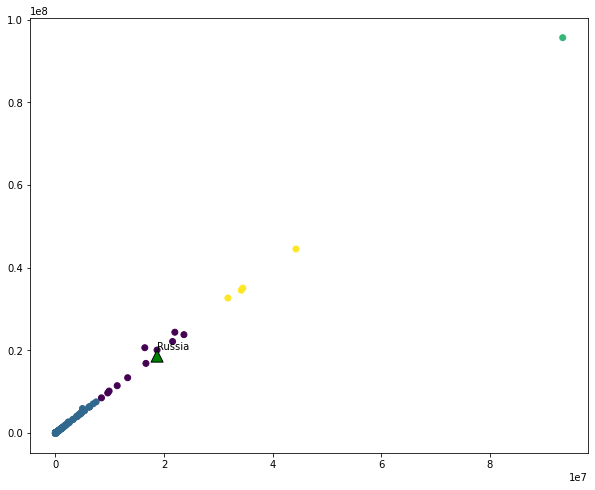

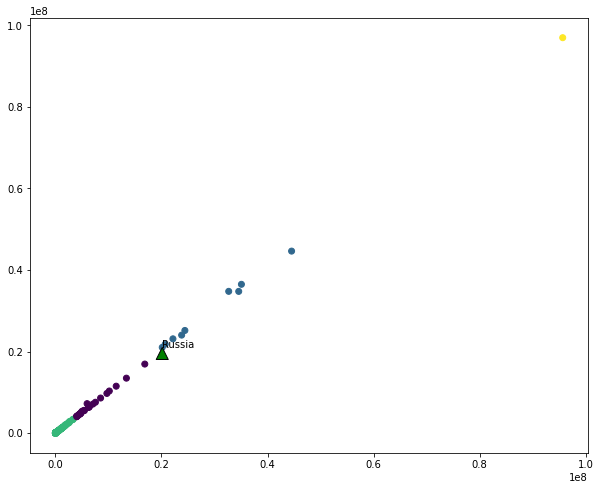

In [ ]:
for k in conf_months:
  sc_df_c_month = sc.fit_transform(k)
  wcss = []
  for i in range(1, 11):
    tskm = TimeSeriesKMeans(n_clusters = i)
    tskm.fit(sc_df_c_month)
    wcss.append(tskm.inertia_)
  plt.plot(range(1, 11), wcss)
  plt.show()
  ts_c = TimeSeriesKMeans(n_clusters=4, metric='dtw').fit(sc_df_c_month)
  plt.figure(figsize=(10, 8))
  display(plt.scatter(k.iloc[:,0], k.iloc[:,-1],  c=ts_c.labels_))
  plt.annotate('Russia', xy =(k.iloc[147,0], k.iloc[147,-1]),  arrowprops = dict(facecolor ='green', shrink = 0.05))

In [ ]:
deaths_months = []
deaths_months.append(df_deaths.iloc[:,0:31])
deaths_months.append(df_deaths.iloc[:,31:61])
deaths_months.append(df_deaths.iloc[:,61:92])
deaths_months.append(df_deaths.iloc[:,92:123])
deaths_months.append(df_deaths.iloc[:,123:151])
deaths_months.append(df_deaths.iloc[:,151:182])
deaths_months.append(df_deaths.iloc[:,182:212])
deaths_months.append(df_deaths.iloc[:,212:243])
deaths_months.append(df_deaths.iloc[:,243:273])
deaths_months.append(df_deaths.iloc[:,273:304])
deaths_months.append(df_deaths.iloc[:,304:335])
deaths_months.append(df_deaths.iloc[:,335:365])

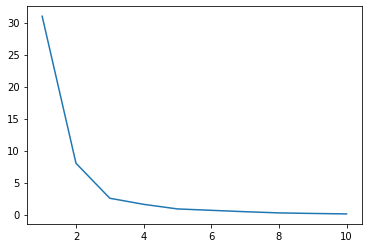

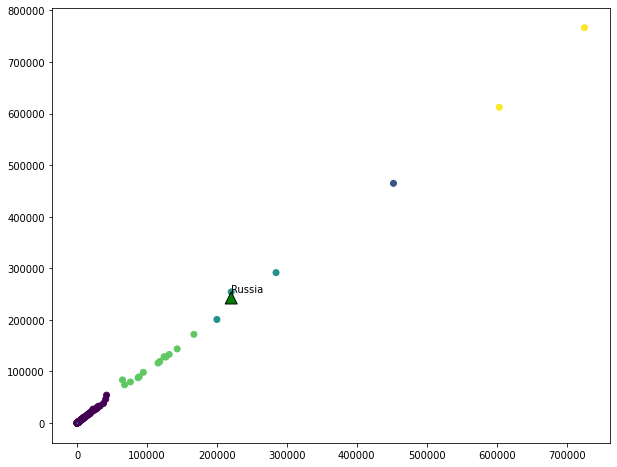

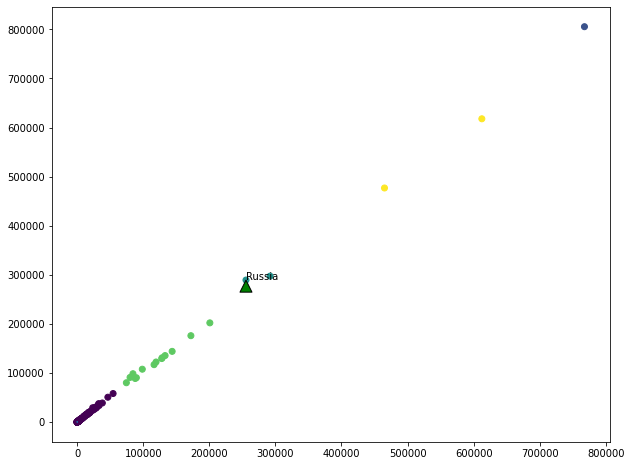

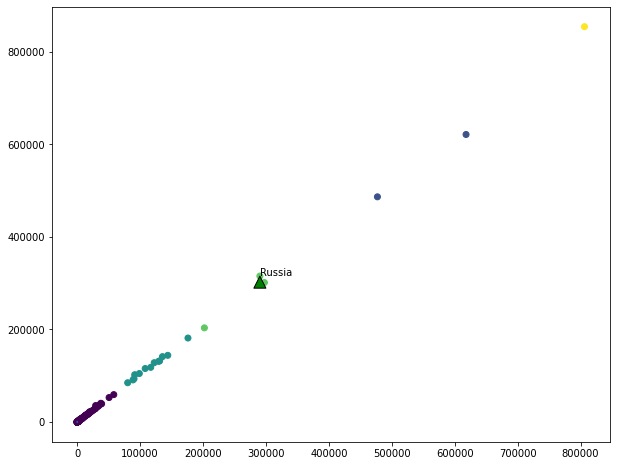

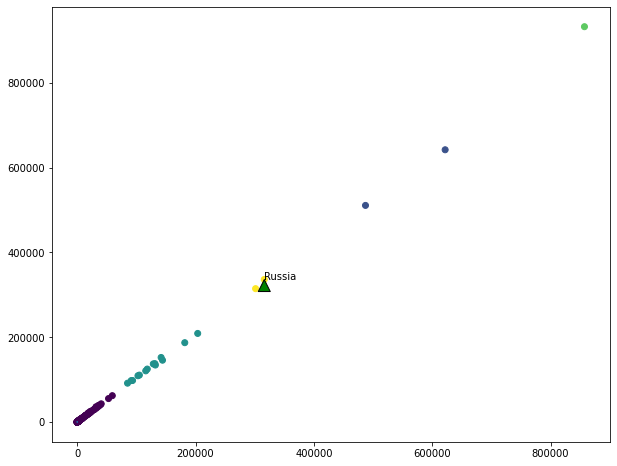

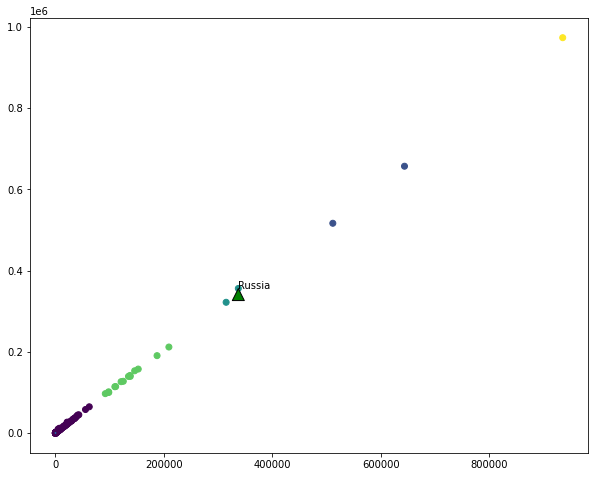

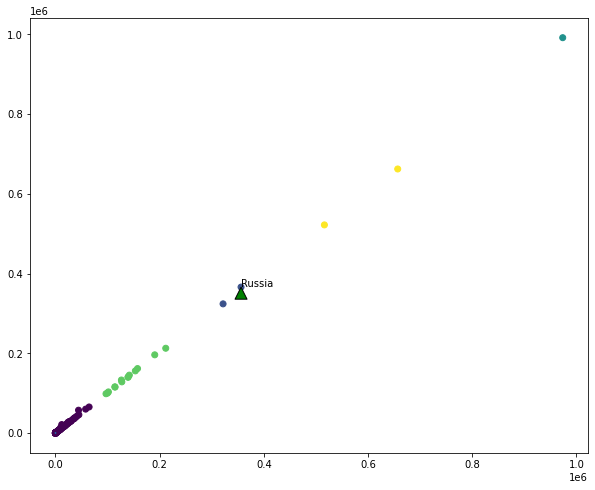

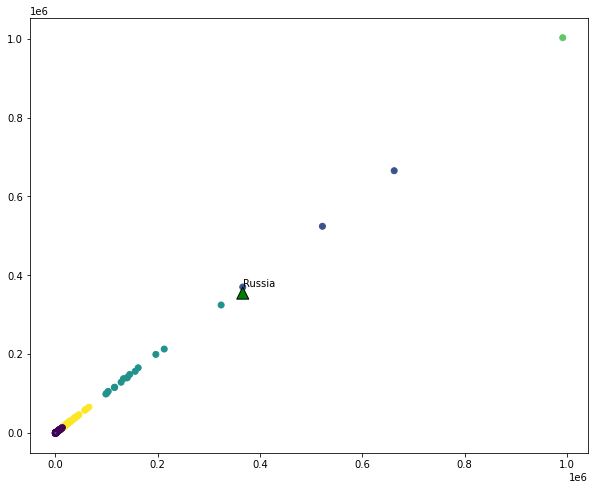

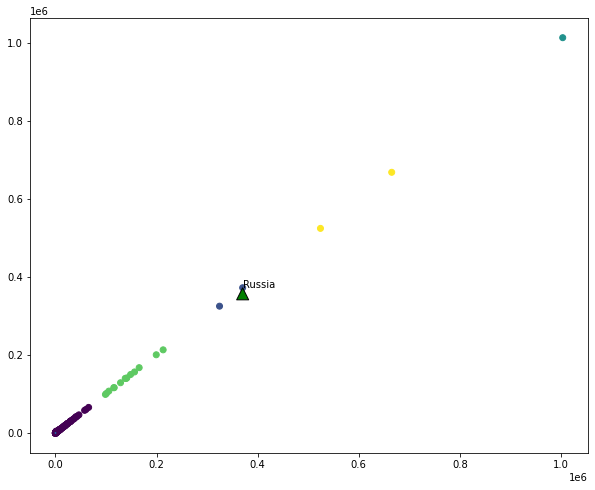

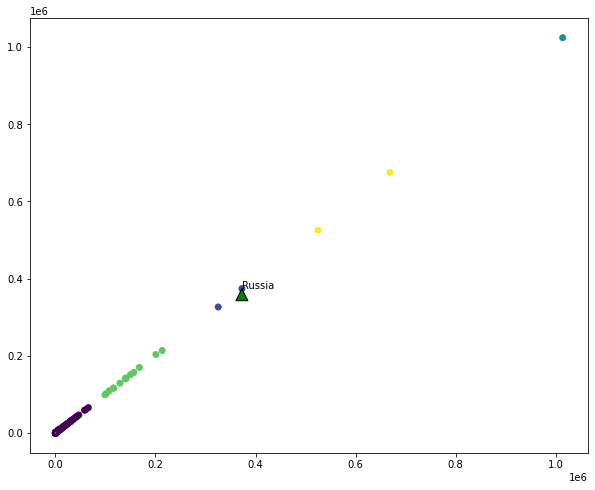

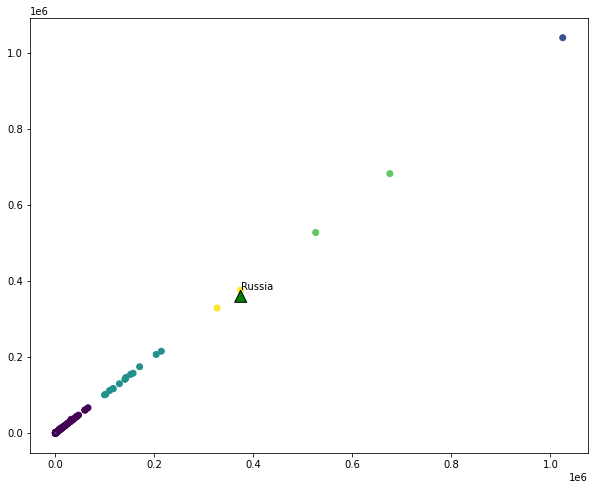

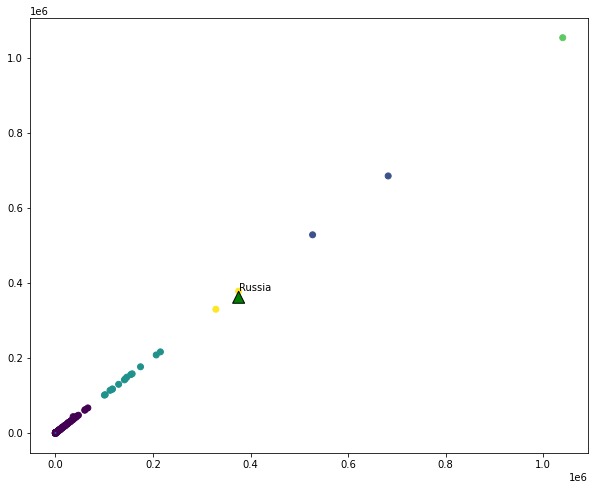

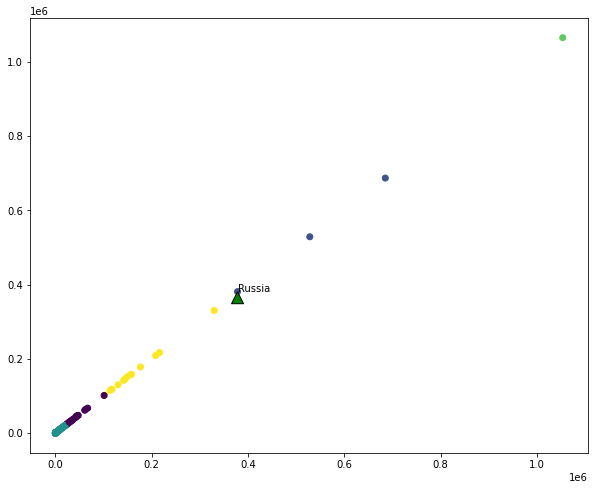

In [ ]:
for j in deaths_months:
  sc_df_d_month = sc.fit_transform(j)
  wcss = []
  for i in range(1, 11):
    tskm = TimeSeriesKMeans(n_clusters = i)
    tskm.fit(sc_df_d_month)
    wcss.append(tskm.inertia_)
  plt.plot(range(1, 11), wcss)
  plt.show()
  ts_d = TimeSeriesKMeans(n_clusters=5, metric='dtw').fit(sc_df_d_month)
  plt.figure(figsize=(10, 8))
  display(plt.scatter(j.iloc[:,0], j.iloc[:,-1],  c=ts_d.labels_))
  plt.annotate('Russia', xy =(j.iloc[147,0], j.iloc[147,-1]),  arrowprops = dict(facecolor ='green', shrink = 0.05))

Россия переходит из одного кластера в другой по показаниям заболеваемости. Это может быть связано с тем, что скорость роста заболеваемости изменяется с течением времени у России и у других стран.